In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("../tests/test_results_sep_pretraining.csv")

# Hiển thị thông tin cơ bản
print("Thông tin tổng quan về dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   snt_id    300 non-null    object 
 1   sdr       300 non-null    float64
 2   sdr_i     300 non-null    float64
 3   si-snr    300 non-null    float64
 4   si-snr_i  300 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.8+ KB
None

Thống kê mô tả:
              sdr       sdr_i      si-snr    si-snr_i
count  300.000000  300.000000  300.000000  300.000000
mean    22.879745   22.654876   22.285683   22.281639
std      6.860803    6.879427    7.001214    6.995662
min     -4.451967   -4.452468   -5.016295   -5.016763
25%     22.540394   22.286064   21.873215   21.915070
50%     24.368169   24.109842   23.819384   23.780406
75%     25.724973   25.518800   25.263271   25.273025
max     41.715943   41.715420   41.587112   41.586613


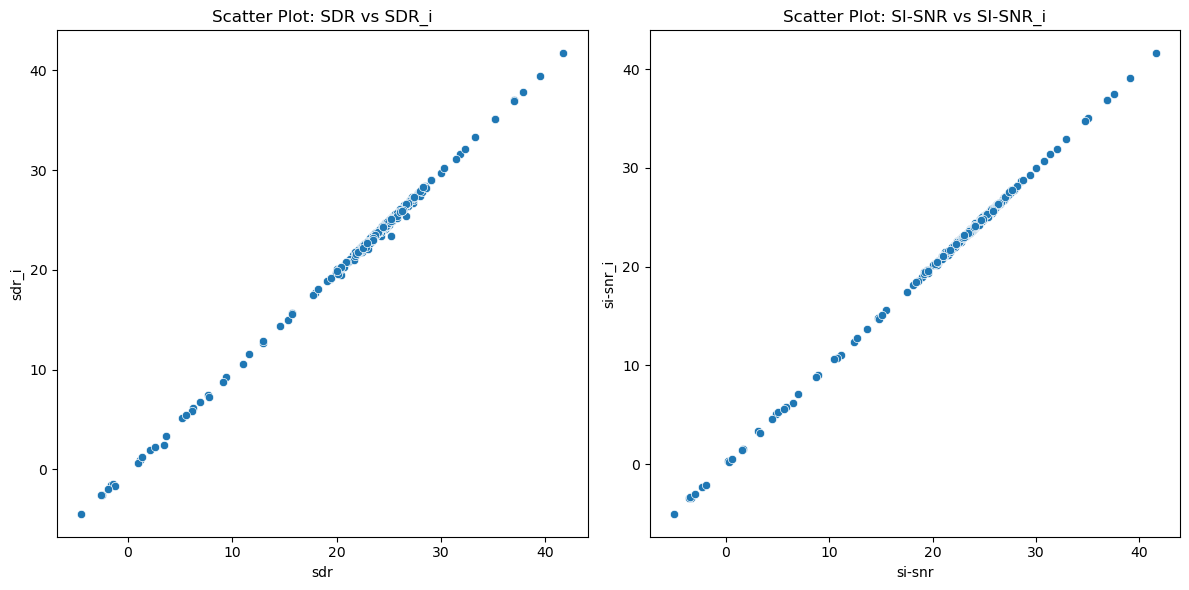

In [45]:
# Biểu đồ phân tán giữa các thông số
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['sdr'], y=df['sdr_i'])
plt.title('Scatter Plot: SDR vs SDR_i')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['si-snr'], y=df['si-snr_i'])
plt.title('Scatter Plot: SI-SNR vs SI-SNR_i')

plt.tight_layout()
plt.show()

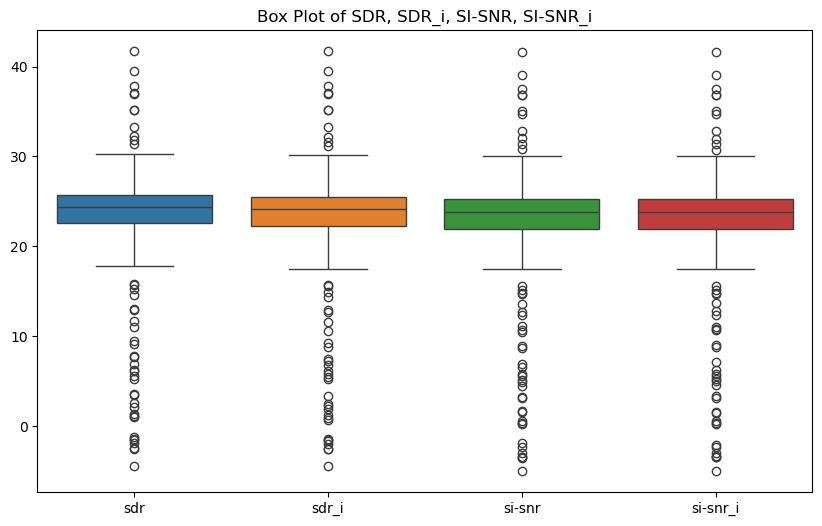

In [46]:
# Biểu đồ hộp (box plot) để xem sự phân bố của từng chỉ số
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sdr', 'sdr_i', 'si-snr', 'si-snr_i']])
plt.title("Box Plot of SDR, SDR_i, SI-SNR, SI-SNR_i")
plt.show()

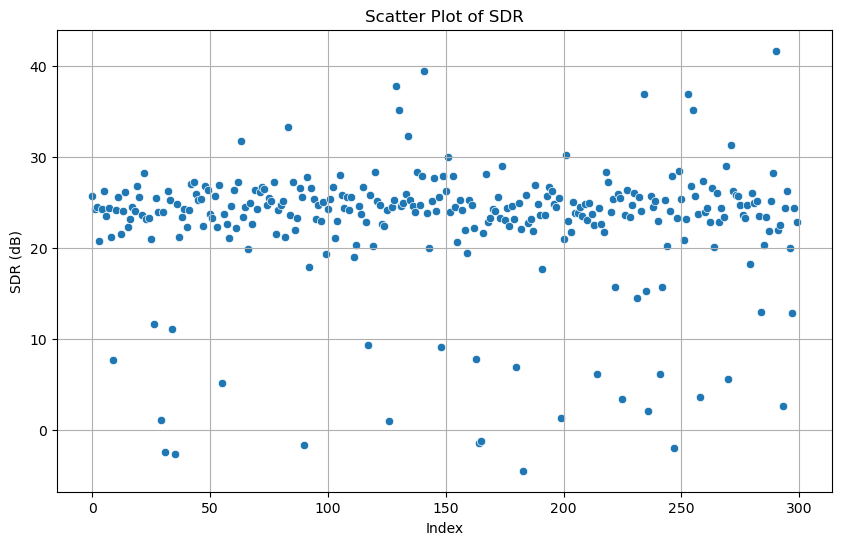

In [47]:
# Vẽ biểu đồ phân tán (scatter plot) cho chỉ số SDR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['sdr'])
plt.title('Scatter Plot of SDR')
plt.xlabel('Index')
plt.ylabel('SDR (dB)')
plt.grid(True)
plt.show()

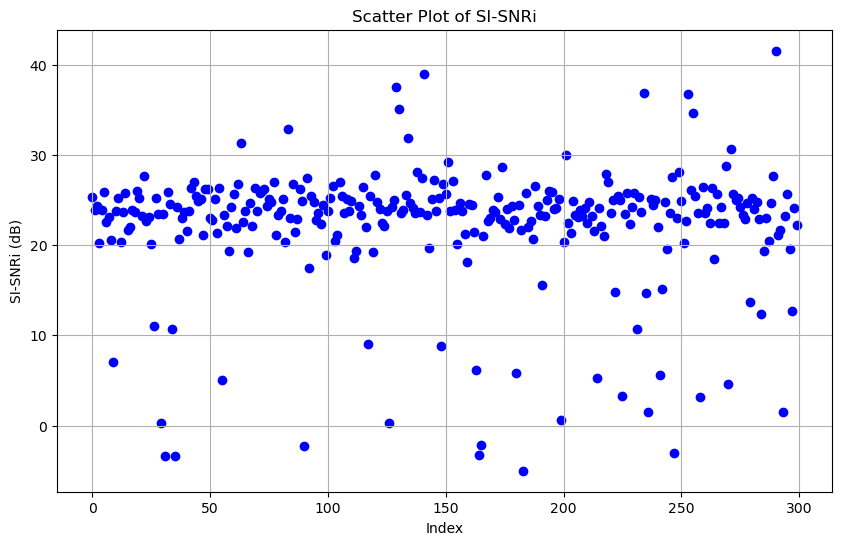

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['si-snr_i'], color='b', label='SI-SNRi')
plt.title('Scatter Plot of SI-SNRi')
plt.xlabel('Index')
plt.ylabel('SI-SNRi (dB)')
plt.grid(True)
plt.show()

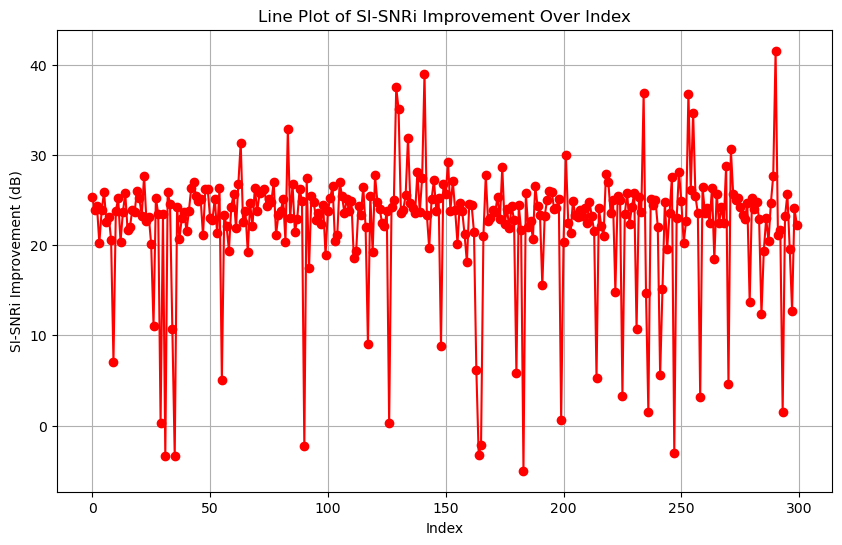

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['si-snr_i'], marker='o', linestyle='-', color='r', label='SI-SNRi Improvement')
plt.title('Line Plot of SI-SNRi Improvement Over Index')
plt.xlabel('Index')
plt.ylabel('SI-SNRi Improvement (dB)')
plt.grid(True)
plt.show()

In [50]:
# Áp dụng Moving Average để làm mượt dữ liệu
window_size = 5  # Số điểm trung bình động (có thể điều chỉnh)
df['si-snr_i_smoothed'] = df['si-snr_i'].rolling(window=window_size, min_periods=1).mean()

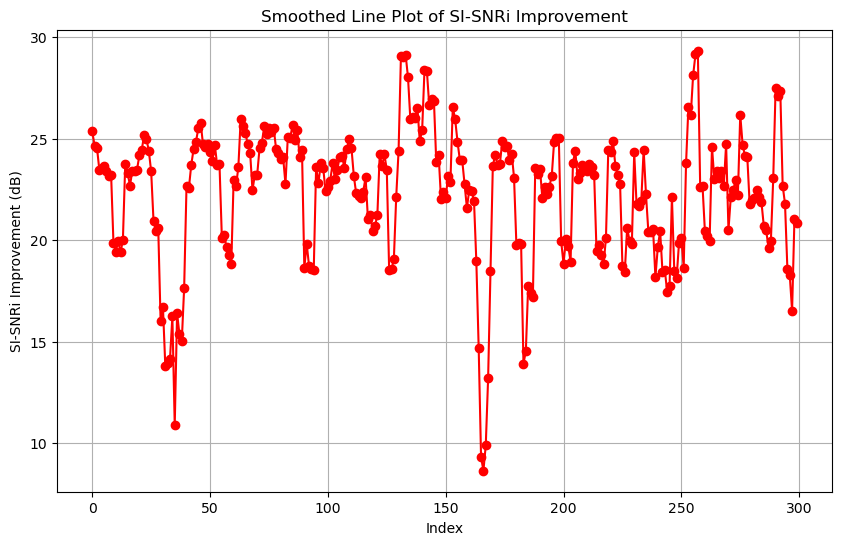

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['si-snr_i_smoothed'], marker='o', linestyle='-', color='r', label='Smoothed SI-SNRi Improvement')
plt.title('Smoothed Line Plot of SI-SNRi Improvement')
plt.xlabel('Index')
plt.ylabel('SI-SNRi Improvement (dB)')
plt.grid(True)
plt.show()

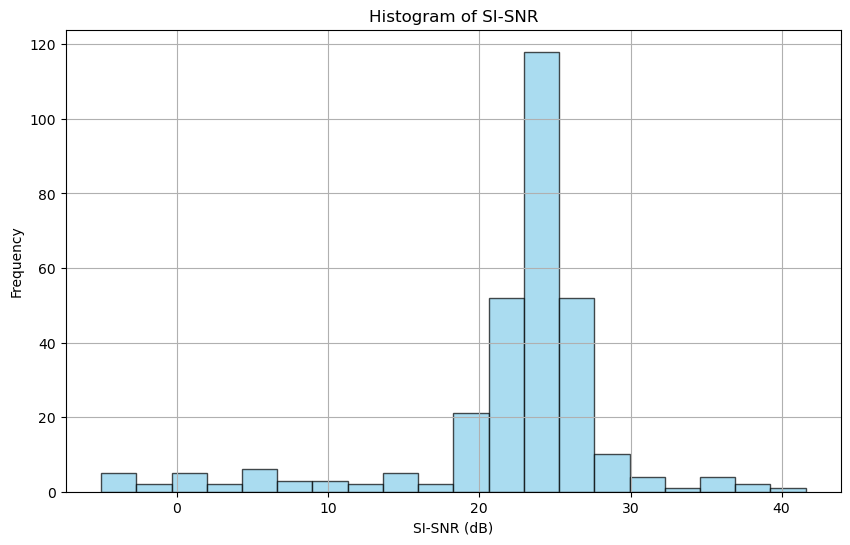

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df['si-snr'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SI-SNR')
plt.xlabel('SI-SNR (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

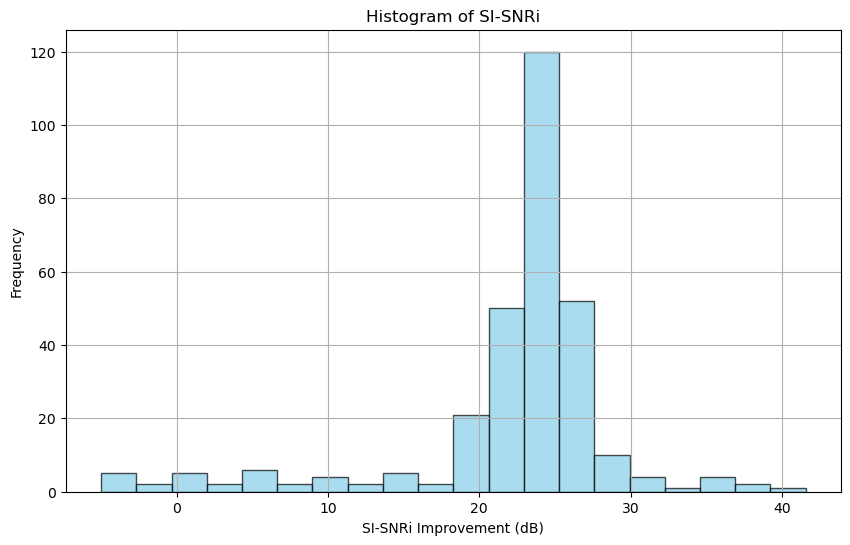

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['si-snr_i'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SI-SNRi')
plt.xlabel('SI-SNRi Improvement (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

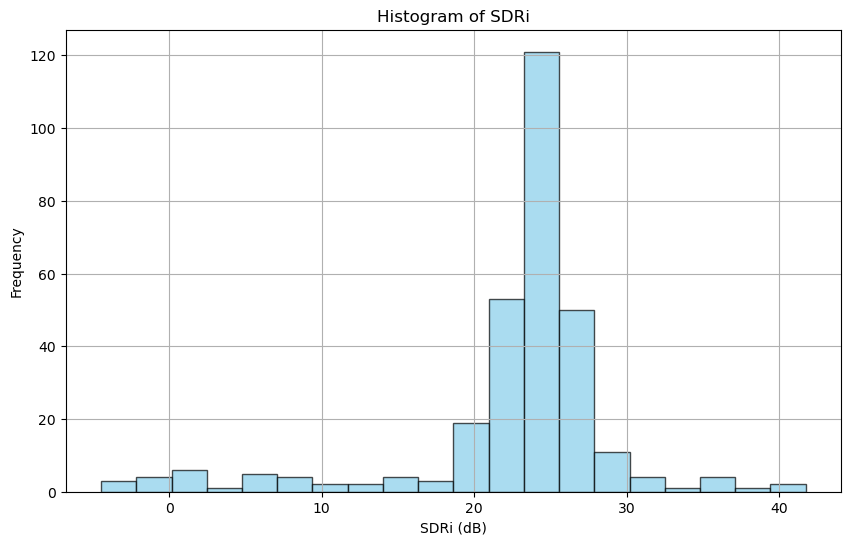

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['sdr_i'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SDRi')
plt.xlabel('SDRi (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
# Heatmap hiển thị mối tương quan giữa các thông số
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()